In [30]:
%matplotlib inline
import datetime as datetime
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = '14'
import numpy as np
from numpy import trapz
import pandas as pd
import seaborn as sns

## Loading DataFrames

In [2]:
udf = pd.read_pickle('Your/Data/Path/tweaked_user_dataframe.pkl')
udf

,location,id,name,verified,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,country
0,"Waiyaki Way, Westlands",697374646614781952,AACC-CETA,False,1565,666,2795,Kenya
1,NaN,87371572,ACNA,False,9023,1796,3393,NaN
2,Anglican Communion Office,903497472,Anglican Alliance,False,2291,1195,3599,United Kingdom
3,Rome,761714520,Anglican Centre Rome,False,2681,839,1733,Italia
4,"Nairobi, Kenya",1020255964044328961,Anglican Church of Kenya,False,1095,185,567,Kenya
...,...,...,...,...,...,...,...,...
166,"Federal Way, WA",11859822,World Vision USA,True,554386,14283,92602,Sénégal
164,"Plot 15B Nakasero, Kampala",759998299,World Vision Uganda,False,4278,580,3375,United Kingdom
167,"Dakar, Senegal",830807449,World Vision West Africa,False,2245,563,2088,United States
157,"Addis Ababa, Ethiopia",2231308272,WorldVision Ethiopia,False,1958,178,420,België / Belgique / Belgien


In [3]:
df = pd.read_pickle('Your/Data/Path/tweet_dataframe_p5.pkl')
df

,author_id,text,lang,referenced_tweets,reply_settings,conversation_id,id,created_at,entities.mentions,entities.annotations,...,entities.urls,in_reply_to_user_id,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates,withheld.copyright,withheld.country_codes,withheld.scope,entities.cashtags,text_processed
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit ...,en,"[{'type': 'retweeted', 'id': '1437029861676228...",everyone,1437051433480753156,1437051433480753156,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerS...","[{'start': 93, 'end': 95, 'probability': 0.919...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[thanking, god, historic, moment, church, hist..."
1,697374646614781952,RT @sceptwic: Another important step in road t...,en,"[{'type': 'retweeted', 'id': '1437043141979295...",everyone,1437051325255192582,1437051325255192582,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[another, important, step, road, #justicedigni..."
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of ...,en,NaN,everyone,1436979065114800131,1436979065114800131,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.516...",...,"[{'start': 213, 'end': 236, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[congratulations, ven, rose, okeno, ack, dioce..."
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Dio...,en,NaN,everyone,1436975615480041473,1436975615480041473,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5...",...,"[{'start': 239, 'end': 262, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[consecration, service, ven, rose, okeno, ack,..."
4,697374646614781952,We are looking forward to today’s Consecration...,en,"[{'type': 'replied_to', 'id': '143695708915549...",everyone,1436957089155493889,1436957092787757056,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6...",...,NaN,697374646614781952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[looking, forward, today, consecration, enthro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308837,2193947323,In our New Year Message to the Nation we proff...,en,"[{'type': 'quoted', 'id': '1082850893807144962'}]",everyone,1082937561537044480,1082937561537044480,2019-01-09 09:50:09+00:00,NaN,NaN,...,"[{'start': 271, 'end': 294, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[new, year, message, nation, proffered, areas,..."
308838,2193947323,RT @NewsDayZimbabwe: THE @zccinzim has launche...,en,"[{'type': 'retweeted', 'id': '1082932233500065...",everyone,1082934512777117696,1082934512777117696,2019-01-09 09:38:02+00:00,"[{'start': 3, 'end': 19, 'username': 'NewsDayZ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[launched, fresh, bid, broker, dialogue, presi..."
308839,2193947323,We can choose the route of engagement or that ...,en,NaN,everyone,1082904479526240256,1082904479526240256,2019-01-09 07:38:41+00:00,"[{'start': 211, 'end': 227, 'username': 'NewsD...",NaN,...,"[{'start': 183, 'end': 206, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[choose, route, engagement, conflict, route, i..."
308840,2193947323,"For many Zimbabweans, 2019 has come amidst muc...",en,NaN,everyone,1082548265617371137,1082548265617371137,2019-01-08 08:03:13+00:00,"[{'start': 187, 'end': 199, 'username': 'EFZZI...",NaN,...,"[{'start': 264, 'end': 287, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[many, zimbabweans, come, amidst, much, hardsh..."


## Cleanup

In [4]:
# Functions
# --- Drop columns not needed for analysis from tweet DataFrame
def clean_tweet(df):
    return (df
           .drop(columns=[c for c in df.columns if 'entities.cashtags' in c])
           .drop(columns=['id', 'lang', 'in_reply_to_user_id', 'conversation_id',
                          'public_metrics.retweet_count', 'public_metrics.reply_count',
                          'public_metrics.like_count', 'public_metrics.quote_count',
                          'entities.urls',
                          'geo.place_id', 'geo.coordinates.type', 'geo.coordinates.coordinates', 
                          'withheld.copyright', 'withheld.country_codes', 'withheld.scope', 'reply_settings'])
                          )

# --- Modify tweet DataFrame to add new columns needed for analysis
def modify_tweet(df):
    return (clean_tweet(df)
                .assign(is_reply=df['text'].str.startswith('@'),
                   referenced_type=df['referenced_tweets'].apply(lambda t: t[0]['type'] if isinstance(t, list) else np.nan),
                   length=lambda df_:df_.text.str.len(),
                   tweet_count=1,
                   created_truncated=df['created_at'].apply(lambda d: datetime.date(d.year, d.month, d.day)),
                  )
           )

# --- merge modified tweet and user DataFrames
def create_analysis_frame(df1, df2):
    return(modify_tweet(df1)
            .merge(df2, left_on='author_id', right_on='id', how='left')
            .drop(columns = ['id', 'referenced_tweets', 'verified', 'location',
                                'public_metrics.following_count', 'public_metrics.tweet_count'])
            )

# Main
tdf = create_analysis_frame(df, udf)

with pd.option_context('display.max_colwidth', 280):
    display(tdf)

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit @LesmoreGEzkiel @DrMwaniki @fmwombeki Thanking God 4 this historic moment n church history n Kenya! 2 God b the glory! Ashe! Amen! @Oikoumene @AaccCeta @AdNAUbuntu @JaCouncilChurch @ncccusa @iamepiscopalian @GETIWCC @WCCpaween @An...,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerSmith7', 'id': '1868363888'}, {'start': 19, 'end': 28, 'username': 'AaccCeta', 'id': '697374646614781952'}, {'start': 29, 'end': 45, 'username': 'ArchbishopSapit', 'id': '798412484742959105'}, {'start': 46, 'end': 61, 'username': '...","[{'start': 93, 'end': 95, 'probability': 0.9196, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[thanking, god, historic, moment, church, history, kenya, god, glory, ashe, amen]",False,retweeted,363,1,2021-09-12,AACC-CETA,1565,Kenya
1,697374646614781952,RT @sceptwic: Another important step in road to #JusticeDignitySolidarity. Kenyan churches leading the way it seems as number of women in #episcopate rises again. @ACK @full_kenya https://t.co/CAPRZdimkq,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic', 'id': '35702398'}]",NaN,"[{'start': 48, 'end': 73, 'tag': 'JusticeDignitySolidarity'}]","[another, important, step, road, #justicedignitysolidarity, kenyan, churches, leading, way, seems, number, women, #episcopate, rises, <-url->]",False,retweeted,203,1,2021-09-12,AACC-CETA,1565,Kenya
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of Butere. The first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. We thank God for the new chapters being written in the history of the Church. https://t.co/6Up7M3cEsb,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.5163, 'type': 'Person', 'normalized_text': 'Ven Rose Okeno'}, {'start': 108, 'end': 131, 'probability': 0.5879, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 144, 'end': 146, 'probability': 0.976, 'type':...",NaN,"[congratulations, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, thank, god, new, chapters, written, history, church, <-url->]",False,NaN,236,1,2021-09-12,AACC-CETA,1565,Kenya
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Diocese of Butere. She is the first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. New chapters being written in the history of the Church. We thank God for such moments. https://t.co/hzkus3byb5,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5667, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 217, 'end': 219, 'probability': 0.9677, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[consecration, service, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, new, chapters, written, history, church, thank, god, moments, <-url->]",False,NaN,262,1,2021-09-12,AACC-CETA,1565,Kenya
4,697374646614781952,We are looking forward to today’s Consecration and Enthronement of the first Woman Bishop in The Anglican Church of Kenya Ven. Rose Okeno.,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6155, 'type': 'Place', 'normalized_text': 'Kenya Ven'}, {'start': 127, 'end': 136, 'probability': 0.8553, 'type': 'Person', 'normalized_text': 'Rose Okeno'}]",NaN,"[looking, forward, today, consecration, enthronement, first, woman, bishop, anglican, church, kenya, ven, rose, okeno]",False,replied_to,138,1,2021-09-12,AACC-CETA,1565,Kenya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238918,2193947323,In our New Year Message to the Nation we proffered 4 areas that need to be address to avert the possible catastrophe

## Functions

In [5]:
# Functions for preparing the dataframe
# --- Read keywords from file and return them as list
def prepare_keywords(file):
    keys = pd.read_csv(file)
    s = ''
    return [(s+word) for word in keys['keywords']]

# --- Create new column with value=1 if keyword is in tweet and value=0 if not
def covid_relation(df, keylist):
    return df.assign(covid_related=df['text_processed'].apply(lambda t: 1 if any(f" {keyword} " in ' '.join(t) for keyword in keylist) else 0))

# --- Create new column by inverting the column created above
def no_covid_relation(df, keylist):
    return df.assign(not_covid_related=df['covid_related'].apply(lambda t: 0 if t==1 else 1))

In [11]:
# Functions for plotting
# --- Detrender removes trends over period to better identify significant short time changes
def detrender(df, periods=None, method=None):
    periods = 30 if periods is None else periods
    func = np.mean if method is None else method

    return df - df.rolling(periods).apply(func)

# --- Put the data in the dataframe in units of deviation from the mean.
def standardize(df):
    return (df - df.mean()) / df.std()

# --- Plots input dataframe and adds lines for sigma-levels 1 to 3
def make_normalplot(df, random=True):
    if random:
        plt.plot(df.index.values,
                 np.random.normal(size=df.shape[0]),
                 lw=0.8,
                 alpha=0.75)
        plt.ylim((-5, 5))
        plt.title("Generated normal time series with $\sigma$ bands")
    else:
        plt.plot(df.index.values, df.values, lw=0.8, alpha=0.75)
        #plt.ylim((-5, 8))
        plt.title("Dataframe with bands showing up to 3 sigma")

    plt.axhline(y=1, color="red")
    plt.axhline(y=-1, color="red")
    plt.axhline(y=2, color="orange")
    plt.axhline(y=-2, color="orange")
    plt.axhline(y=3, color="yellow")
    plt.axhline(y=-3, color="yellow")

    arrowprops = dict(arrowstyle="-",
                      color="black",
                      lw=2)

    #textprops = dict(rotation="vertical", fontsize=16)
    textprops = dict()

    plt.annotate("1 $\sigma$",
                 xy=(df.index.values[10], 1),
                 xytext=(df.index.values[10], -1.5),
                 arrowprops=arrowprops,
                 **textprops)

    plt.annotate("2 $\sigma$",
                 xy=(df.index.values[50], 2),
                 xytext=(df.index.values[50], -2.5),
                 arrowprops=arrowprops,
                 **textprops
                 )

    plt.annotate("3 $\sigma$",
                 xy=(df.index.values[100], 3),
                 xytext=(df.index.values[100], -3.5),
                 arrowprops=arrowprops,
                 **textprops
                 )
        
#make_normalplot(ddf, random=True)

# --- Plot input dataframe and add date_markers
def plot_ts(series,
            ma=False,
            raw=False,
            expanding=False,
            ewma=False,
            overall=False,
            median=False,
            title=None,
            time_bin="hour",
            date_markers=None,
            y_label=None,
            custom_yaxis=None,
            custom_ax=None,
            **kwargs):
    """
    custom plotting function for our time-series dataframes. 
    Args:
        series: pd.Series or pd.Dataframe
        raw: plot the basic values in the frame
        expanding: plot an expanding mean
        ewma: plot an ewma line
        overall: plot an overall mean
        median: plot the overall median
        title: custom title to use
        time_bin: marks the y-axis correctly
        date_markers: plots a dot on the signal where a given date is noted.
        y_label: custom y-axis label
        custom_yaxis: custom axis
        custom_ax: passing a custom Axes here will assign this plot to that
                   axis
   """
    if isinstance(series, pd.DataFrame):
        series = series["counts"]

    lw = 0.75
    if custom_ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    else:
        ax = custom_ax

    if y_label is None:
        period = series.index.to_period().freqstr
        _bin = "day" if period == "D" else "hour"
        _y_label = "tweets per {}".format(_bin)
        plt.ylabel(_y_label)
    else:
        if isinstance(y_label, str):
            plt.ylabel(y_label)

    if date_markers is not None:
        def dateindex_to_str(index, include_hour=True):
            idx = 16 if include_hour else 10
            return [str(date)[0:idx].replace("T", " ")
                    for date in index.values]

        (ax.plot(date_markers, series.loc[date_markers],
                 "o", markersize=4, color='m', label="point"))

    if raw:
        series.plot(label="raw", lw=lw, ax=ax)

    if ma:
        (series.rolling(ma).mean()
         .plot(ax=ax, label="{}{} ma".format(ma, time_bin), lw=lw))

    if ewma:
        if isinstance(ewma, int):
            (series.ewm(span=ewma).mean()
             .plot(ax=ax, label="emwa - span {}".format(ewma), lw=lw))
        else:
            (series.ewm(alpha=0.05).mean()
             .plot(ax=ax, label="emwa, $\alpha = 0.05$", lw=lw))

    if expanding:
        series.expanding().mean().plot(ax=ax, label="expanding_mean", lw=lw)

    if overall:
        (pd.DataFrame(series)
         .assign(global_mean=lambda x: x['count']
                 .mean())["global_mean"]
         .plot(ax=ax, label="global_mean", lw=lw))

    if median:
        (pd.DataFrame(series)
         .assign(global_median=lambda x: x['count'].median())["global_median"]
         .plot(ax=ax, label="global_median"))

    plt.tight_layout()
    plt.xlabel("datetime")

    if custom_yaxis is not None:
        def log_axis(x, pos):
            'The two args are the value and tick position'
            str_ = '$' + "2^{" + str(x) + "}" + '$'
            return str_
        formatter = FuncFormatter(log_axis)
        ax.yaxis.set_major_formatter(formatter)

    if title:
        ax.set_title(title)
    if custom_ax is not None:
        return
    else:
        return ax

#plt.rcParams["figure.figsize"] = (20,5)
#plot_ts(ddf, raw=True, title="$ln$ transformed standardized $\Delta$ Tweets from previous hour")

## Analysis Hypothesis 2.1

##### Import keywords

In [6]:
# Load keywords identified in the "Coronavirus (COVID-19) Tweets Dataset" by Lamsal
keylist = prepare_keywords('keywords.txt')
keylist

['corona',
 '#corona',
 'coronavirus',
 '#coronavirus',
 'covid',
 '#covid',
 'covid19',
 '#covid19',
 'covid-19',
 '#covid-19',
 'sarscov2',
 '#sarscov2',
 'sars cov2',
 'sars cov 2',
 'covid_19',
 '#covid_19',
 '#ncov',
 'ncov',
 '#ncov2019',
 'ncov2019',
 '2019-ncov',
 '#2019-ncov',
 'pandemic',
 '#pandemic',
 '#2019ncov',
 '2019ncov',
 'quarantine',
 '#quarantine',
 'flatten the curve',
 'flattening the curve',
 '#flatteningthecurve',
 '#flattenthecurve',
 'hand sanitizer',
 '#handsanitizer',
 '#lockdown',
 'lockdown',
 'social distancing',
 '#socialdistancing',
 'work from home',
 '#workfromhome',
 'working from home',
 '#workingfromhome',
 'ppe',
 'n95',
 '#ppe',
 '#n95',
 '#covidiots',
 'covidiots',
 'herd immunity',
 '#herdimmunity',
 'pneumonia',
 '#pneumonia',
 'chinese virus',
 '#chinesevirus',
 'wuhan virus',
 '#wuhanvirus',
 'kung flu',
 '#kungflu',
 'wearamask',
 '#wearamask',
 'wear a mask',
 'vaccine',
 'vaccines',
 '#vaccine',
 '#vaccines',
 'corona vaccine',
 'corona 

##### Check tweets for COVID-keywords

In [7]:
# Drop columns not needed for this analysis,
# then check if tweet contains COVID keywords
# and add inversion of check as another column
ctdf = (tdf
       .drop(columns=['author_id', 'text', 'created_truncated', 'referenced_type',
                      'entities.mentions', 'entities.annotations', 'entities.hashtags',
                      'is_reply', 'length', 'public_metrics.followers_count'])
       .pipe(covid_relation, keylist)
       .pipe(no_covid_relation, keylist)
      )
ctdf

,created_at,text_processed,tweet_count,name,country,covid_related,not_covid_related
0,2021-09-12 13:52:15+00:00,"[thanking, god, historic, moment, church, hist...",1,AACC-CETA,Kenya,0,1
1,2021-09-12 13:51:49+00:00,"[another, important, step, road, #justicedigni...",1,AACC-CETA,Kenya,0,1
2,2021-09-12 09:04:41+00:00,"[congratulations, ven, rose, okeno, ack, dioce...",1,AACC-CETA,Kenya,0,1
3,2021-09-12 08:50:59+00:00,"[consecration, service, ven, rose, okeno, ack,...",1,AACC-CETA,Kenya,0,1
4,2021-09-12 07:37:22+00:00,"[looking, forward, today, consecration, enthro...",1,AACC-CETA,Kenya,0,1
...,...,...,...,...,...,...,...
238918,2019-01-09 09:50:09+00:00,"[new, year, message, nation, proffered, areas,...",1,Zimbabwe Council of Churches,NaN,0,1
238919,2019-01-09 09:38:02+00:00,"[launched, fresh, bid, broker, dialogue, presi...",1,Zimbabwe Council of Churches,NaN,0,1
238920,2019-01-09 07:38:41+00:00,"[choose, route, engagement, conflict, route, i...",1,Zimbabwe Council of Churches,NaN,0,1
238921,2019-01-08 08:03:13+00:00,"[many, zimbabweans, come, amidst, much, hardsh...",1,Zimbabwe Council of Churches,NaN,0,1


##### Prepare dataframes for analysis

In [9]:
# Set up dataframe for further analysis 
# with total/COVID/non-COVID tweet counts per day
ddf =(ctdf
      .set_index('created_at')
      .sort_index()
      .resample('d')
      .sum()
     )
ddf

,tweet_count,covid_related,not_covid_related
created_at,,,
2019-01-01 00:00:00+00:00,123,0,123
2019-01-02 00:00:00+00:00,182,0,182
2019-01-03 00:00:00+00:00,213,0,213
2019-01-04 00:00:00+00:00,206,0,206
2019-01-05 00:00:00+00:00,98,0,98
...,...,...,...
2021-09-08 00:00:00+00:00,204,8,196
2021-09-09 00:00:00+00:00,190,8,182
2021-09-10 00:00:00+00:00,215,8,207


In [10]:
# Create dataframe with percentage of COVID-related and
# non-COVID-related communication
ddf_perc_ges = (ddf[['not_covid_related', 'covid_related']]
                .divide(ddf[['not_covid_related', 'covid_related']].sum(axis=1), axis=0)
               )
ddf_perc_ges

,not_covid_related,covid_related
created_at,,
2019-01-01 00:00:00+00:00,1.000000,0.000000
2019-01-02 00:00:00+00:00,1.000000,0.000000
2019-01-03 00:00:00+00:00,1.000000,0.000000
2019-01-04 00:00:00+00:00,1.000000,0.000000
2019-01-05 00:00:00+00:00,1.000000,0.000000
...,...,...
2021-09-08 00:00:00+00:00,0.960784,0.039216
2021-09-09 00:00:00+00:00,0.957895,0.042105
2021-09-10 00:00:00+00:00,0.962791,0.037209


##### Analyse for significant recovery in non-COVID-related communication

           counts
count  985.000000
mean    -0.005415
std      3.659927
min    -19.940136
25%     -0.869903
50%      0.000000
75%      0.831143
max     17.006803


c:\Users\johan\anaconda3\envs\vw_project_env\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


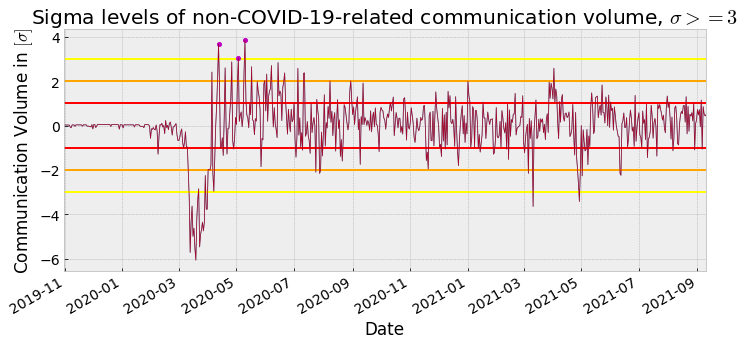

In [12]:
# Convert dataframe values to percentages
counts_ddf = ddf_perc_ges['not_covid_related'].to_frame(name="counts").multiply(100)

print(counts_ddf.diff().describe())

# Configure sigma-level threshold and plot size
UNIT_THRESHOLD = 3
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 5))

# Create first layer in plot - Plot sigma-level for relative change in non-COVID-related communication
(counts_ddf
 .pipe(detrender)
 .dropna()
 .pipe(standardize)
 .pipe(make_normalplot, random=False))

# Create second layer in plot - Plot same graph as in first layer but instead of sigma-level
# add date_markers showing all dates that are above a sigma-level 3 threshold
plot_ts(counts_ddf
        .pipe(detrender)
        .dropna()
        .pipe(standardize),
        raw=True,
        title=f"Sigma levels of non-COVID-19-related communication volume, $\sigma >={UNIT_THRESHOLD}$",
        custom_ax=axes,
        date_markers=(counts_ddf
                      .pipe(detrender)
                      .dropna()
                      .pipe(standardize)
                      .query("counts >= @UNIT_THRESHOLD")
                      .index));

axes.set_xlim(18200, 18880)
axes.set_xlabel('Date')
axes.set_ylabel(r'Communication Volume in $[\sigma]$')
plt.savefig('A1_4 Analysis of significance of non-COVID-19-related Communication Volume Sigma Levels.png', bbox_inches='tight')

           counts
count  985.000000
mean    -0.005415
std      3.659927
min    -19.940136
25%     -0.869903
50%      0.000000
75%      0.831143
max     17.006803
DatetimeIndex(['2020-04-12 00:00:00+00:00', '2020-05-03 00:00:00+00:00',
               '2020-05-10 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='created_at', freq=None)


c:\Users\johan\anaconda3\envs\vw_project_env\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


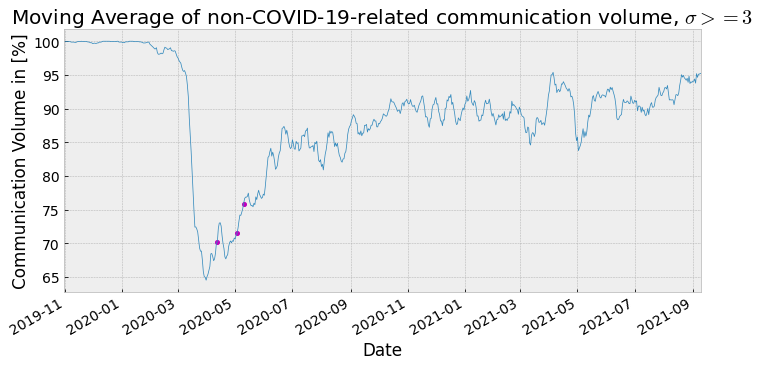

In [13]:
# Convert dataframe values to percentages
counts_ddf = ddf_perc_ges['not_covid_related'].to_frame(name="counts").multiply(100)

print(counts_ddf.diff().describe())

# Calculate and print dates with significant increase (sigma-level >= 3)
# of non-COVID-related communication
print((counts_ddf
                      .pipe(detrender)
                      .dropna()
                      .pipe(standardize)
                      .query("counts >= @UNIT_THRESHOLD")
                      .index))

# Configure sigma-level threshold and plot size
UNIT_THRESHOLD = 3
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 5))

# Plot timeseries of non-COVID-related communication with date_markers
plot_ts(counts_ddf
        .rolling(7)
        .mean(),
        raw=True,
        title=f"Moving Average of non-COVID-19-related communication volume, $\sigma >={UNIT_THRESHOLD}$",
        custom_ax=axes,
        date_markers=(counts_ddf
                      .pipe(detrender)
                      .dropna()
                      .pipe(standardize)
                      .query("counts >= @UNIT_THRESHOLD")
                      .index));

axes.set_xlim(18200, 18880)
axes.set_xlabel('Date')
axes.set_ylabel('Communication Volume in [%]')
plt.savefig('A1_4 Analysis of significance of non-COVID-19-realted Communication.png', bbox_inches='tight')

## Research Question A - Calculate resilience values

area = 531.5019536751445


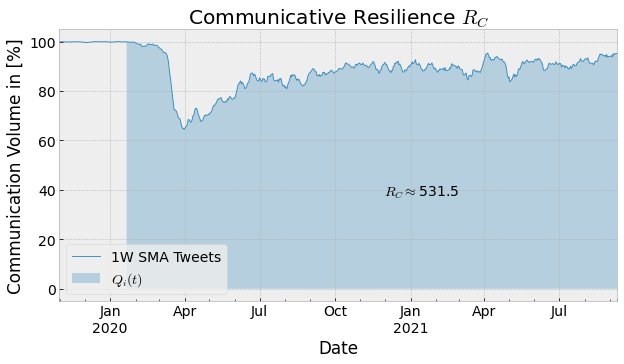

In [14]:
# Setup deduced dataframe with only dates during the pandemic (15.01.2020 onwards)
crisis_df = ddf_perc_ges['not_covid_related'].loc[(ddf_perc_ges.index >= '2020-01-15')]

# The y values.  A numpy array is used here,
# but a python list could also be used.
y = crisis_df.tolist()

# The x values. Calculated by starting at sample x-position 0 
# and then adding the difference to the next date in days to the position
x = [0]
for i in range(len(crisis_df.index)-1):
    x.append(x[i] + (crisis_df.index[i+1] - crisis_df.index[i]).days
)

# Compute the area using the composite trapezoidal rule.
# This equals the resilience value R_C
area = trapz(y, x)
print("area =", area)

# Configure plot size
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 5))

# Plot timeseries for non-COVID-related communication percentage
(ddf_perc_ges['not_covid_related']
 .multiply(100)
 .rolling(7)
 .mean()
 .plot(ax=axes, lw=0.9, label='1W SMA Tweets'));

# Fill area covered by non-COVID-related communication during crisis (blue)
axes.fill_between(crisis_df
                  .index, 
                  crisis_df
                  .multiply(100)
                  .rolling(7)
                  .mean(),
                  alpha=0.3,
                  label=r'$Q_{i}(t)$'
                 )


axes.set_xlim(18200, 18880)
axes.legend()
axes.set_xlabel('Date')
axes.set_ylabel('Communication Volume in [%]')
axes.set_title(r'Communicative Resilience $R_{C}$')
plt.text(0.65, 0.4, r'$R_{C} \approx $' +str(round(area, 2)), horizontalalignment='center', verticalalignment='center', transform=axes.transAxes)
plt.savefig('A1_4 Communicative Resilience total.png', bbox_inches='tight')

##### Resilience Values for single account

In [15]:
# Series with total number of tweets per account
(ctdf
 .groupby('name')
 .sum()
 .tweet_count
 .sort_values()
)

name
Caritas Jordan                        29
World Methodist                       69
Caritas Advocacy                      80
Caritas Switzerland                   81
WorldVision Ethiopia                  86
                                   ...  
NETWORK                             7112
International Christian Concern     7477
World Council of Churches (WCC)     7489
Micah Institute                     8539
Interfaith Matters                 13669
Name: tweet_count, Length: 126, dtype: int64

In [16]:
# Dataframe with daily tweet activity of exemplary account
addf = (ctdf[ctdf['name'] =='WorldVision Ethiopia']
        .set_index('created_at')
        .sort_index()
        .resample('d')
        .sum()
       )
addf

,tweet_count,covid_related,not_covid_related
created_at,,,
2019-01-18 00:00:00+00:00,1,0,1
2019-01-19 00:00:00+00:00,0,0,0
2019-01-20 00:00:00+00:00,0,0,0
2019-01-21 00:00:00+00:00,0,0,0
2019-01-22 00:00:00+00:00,0,0,0
...,...,...,...
2021-07-01 00:00:00+00:00,2,0,2
2021-07-02 00:00:00+00:00,0,0,0
2021-07-03 00:00:00+00:00,0,0,0


In [17]:
# Dataframe with relative non-COVID-related vs. COVID-related daily tweet activity
addf_perc_ges = (addf[['not_covid_related', 'covid_related']]
                 .divide(addf[['not_covid_related', 'covid_related']].sum(axis=1), axis=0)
                 .dropna()
               )
addf_perc_ges

,not_covid_related,covid_related
created_at,,
2019-01-18 00:00:00+00:00,1.000000,0.000000
2019-01-29 00:00:00+00:00,1.000000,0.000000
2019-03-06 00:00:00+00:00,1.000000,0.000000
2019-03-11 00:00:00+00:00,1.000000,0.000000
2019-03-20 00:00:00+00:00,1.000000,0.000000
2019-03-22 00:00:00+00:00,1.000000,0.000000
2019-04-08 00:00:00+00:00,1.000000,0.000000
2019-04-09 00:00:00+00:00,1.000000,0.000000
2019-04-11 00:00:00+00:00,1.000000,0.000000


In [18]:
''' Dataframes for single accounts might not inlcude relevant dates
for further analysis. These dates are added to the dataframe using interpolation methods
before the resilience value over the research period can be estimated.'''

# If first date not included 
# add first row from ddf_perc_ges (dataframe generated with all tweets)
# and copy values from first row of the account's dataframe to the new row
if addf_perc_ges.index[0] != '2019-01-01':
    addf_perc_ges = (addf_perc_ges
                     .reset_index()
                     .append(ddf_perc_ges.reset_index().iloc[0])
                     .set_index('created_at')
                     .sort_index()
                    )
    addf_perc_ges.iloc[0] = addf_perc_ges.iloc[1]

# If start date for period of crisis is no included
# Select last day before 15.01.2020 that is included and copy doublicate it
if not '2020-01-15' in addf_perc_ges.index:
    # Get location of row for 15.01.2020 from dataframe with all tweets
    pos_ddf = (ddf_perc_ges['not_covid_related']
               .index
               .get_loc('2020-01-15'))
    
    # Add row to dataframe for current account
    addf_perc_ges = (addf_perc_ges
                     .reset_index()
                     .append(ddf_perc_ges.reset_index().iloc[pos_ddf])
                     .set_index('created_at')
                     .sort_index()
                    )
    
    # Get location of newly added row in current account's dataframe
    pos_addf = (addf_perc_ges['not_covid_related']
                .index
                .get_loc('2020-01-15'))
    
    # Copy value from last entry before 15.01.2020 to newly added row
    addf_perc_ges.iloc[pos_addf] = addf_perc_ges.iloc[pos_addf-1]   
    
# If last date is not included
# Add last row from ddf_perc_ges
# and copy values from last row from account's dataframe to it
if addf_perc_ges.index[-1:] != '2019-09-12':
    addf_perc_ges = (addf_perc_ges
                     .reset_index()
                     .append(ddf_perc_ges.reset_index().iloc[-1:])
                     .set_index('created_at')
                     .sort_index()
                    )
    addf_perc_ges.iloc[-1:] = addf_perc_ges.iloc[-2:-1]
    
addf_perc_ges

C:\Users\johan\AppData\Local\Temp\ipykernel_9156\2030076025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  addf_perc_ges = (addf_perc_ges
C:\Users\johan\AppData\Local\Temp\ipykernel_9156\2030076025.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  addf_perc_ges = (addf_perc_ges
C:\Users\johan\AppData\Local\Temp\ipykernel_9156\2030076025.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  addf_perc_ges = (addf_perc_ges


,not_covid_related,covid_related
created_at,,
2019-01-01 00:00:00+00:00,1.0,0.0
2019-01-18 00:00:00+00:00,1.0,0.0
2019-01-29 00:00:00+00:00,1.0,0.0
2019-03-06 00:00:00+00:00,1.0,0.0
2019-03-11 00:00:00+00:00,1.0,0.0
...,...,...
2021-06-27 00:00:00+00:00,1.0,0.0
2021-06-29 00:00:00+00:00,1.0,0.0
2021-07-01 00:00:00+00:00,1.0,0.0


area = 371.5833333333333


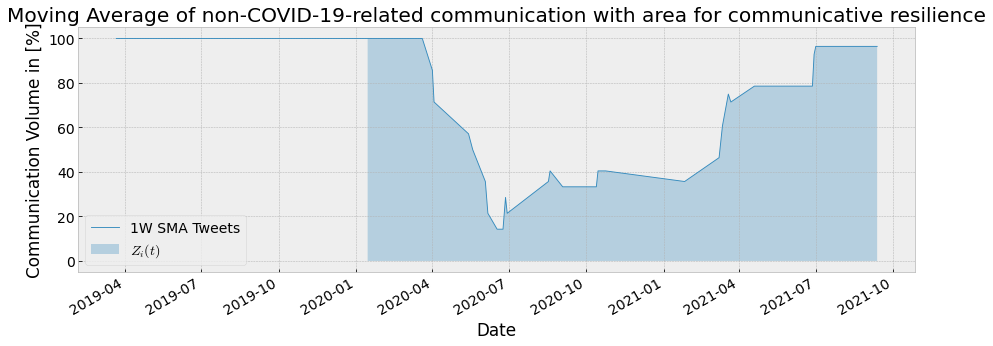

In [21]:
# Setup deduced dataframe with only dates during the pandemic (15.01.2020 onwards)
crisis_df = addf_perc_ges['not_covid_related'].loc[(addf_perc_ges.index >= '2020-01-15')]

# The y values.  A numpy array is used here,
# but a python list could also be used.
y = crisis_df.tolist()

# The x values. Calculated by starting at sample x-position 0 
# and then adding the difference to the next date in days to the position
x = [0]
for i in range(len(crisis_df.index)-1):
    x.append(x[i] + (crisis_df.index[i+1] - crisis_df.index[i]).days
)

# Compute the area using the composite trapezoidal rule.
# This equals the resilience value R_Ci
area = trapz(y, x)
print("area =", area)

# Configure plot size
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))

# Plot timeseries for non-COVID-related communication percentage
(addf_perc_ges['not_covid_related']
 .multiply(100)
 .rolling(7)
 .mean()
 .plot(ax=axes, lw=0.9, label='1W SMA Tweets'));

#Index-Position Number for 2020-01-15
pos_addf = (addf_perc_ges['not_covid_related']
            .index
            .get_loc('2020-01-15'))

#Fill between arg1 according to values from arg2 
#Due to .rolling(7) arg2 begins with 6 times nan -> start 6 before wanted position
axes.fill_between((addf_perc_ges['not_covid_related']
                   .iloc[pos_addf-6:]
                   .index
                  ), 
                  (addf_perc_ges['not_covid_related']
                   .iloc[pos_addf-6:]
                   .multiply(100)
                   .rolling(7)
                   .mean()),
                  alpha=0.3,
                  label=r'$Z_{i}(t)$'
                 )

axes.legend()
axes.set_xlabel('Date')
axes.set_ylabel('Communication Volume in [%]')
axes.set_title('Moving Average of non-COVID-19-related communication with area for communicative resilience')
plt.savefig('A1_4 Communicative resilience account.png', bbox_inches='tight')

##### Resilience values for all accounts seperately

In [25]:
# Functions
# --- Return dataframe with all entries from given account name
def account_specific_ddf(name):
    return (ctdf[ctdf['name'] == name]
            .set_index('created_at')
            .sort_index()
            .resample('d')
            .sum()
           )

# --- Return dataframe with percentages of daily (non-)COVID-related communication
def account_specific_percentages(df):
    return (df[['not_covid_related', 'covid_related']]
            .divide(addf[['not_covid_related', 'covid_related']].sum(axis=1), axis=0)
            .dropna()
           )

# --- Check if crucial values for plotting and resilience calculation are given
# --- if not, interpolate values (as described above for single account)
def assure_crucial_dates(reference_df, df):
    if df.index[0] != '2019-01-01':
        #add first row from reference_df
        df = (df
              .reset_index()
              .append(reference_df.reset_index().iloc[0])
              .set_index('created_at')
              .sort_index()
             )
        #copy values from second row to first
        df.iloc[0] = df.iloc[1]

    if not '2020-01-15' in df.index:
        #get position of wanted index in reference_df
        pos_ddf = (reference_df['not_covid_related']
                   .index
                   .get_loc('2020-01-15'))
        
        #add wanted row from reference_df
        df = (df
              .reset_index()
              .append(reference_df.reset_index().iloc[pos_ddf])
              .set_index('created_at')
              .sort_index()
             )
        
        #get index number for row in account specific df
        pos_addf = (df['not_covid_related']
                    .index
                    .get_loc('2020-01-15'))
        
        #asign value from row before to the wanted row
        df.iloc[pos_addf] = df.iloc[pos_addf-1]   

    if df.index[-1:] != '2019-09-12':
        #add last row from reference_df
        df = (df
              .reset_index()
              .append(reference_df.reset_index().iloc[-1:])
              .set_index('created_at')
              .sort_index()
             )
        #copy values from second last row to last row
        df.iloc[-1:] = df.iloc[-2:-1]
    
    return df

# --- Calculate resilience values R_Ci
def calculate_r(df):
    crisis_df = df['not_covid_related'].loc[(df.index >= '2020-01-15')]
    
    # The y values.  A numpy array is used here,
    # but a python list could also be used.
    y = crisis_df.tolist()

    # The x values. Calculated by starting at sample x-position 0 
    # and then adding the difference to the next date in days to the position
    x = [0]
    for i in range(len(crisis_df.index)-1):
        x.append(x[i] + (crisis_df.index[i+1] - crisis_df.index[i]).days
    )

    # Compute the area using the composite trapezoidal rule.
    return trapz(y, x)

In [26]:
resilience_values = []

# Create list with resilience values R_Ci for all accounts
for name in udf.name:
    addf = account_specific_ddf(name)
    addf_perc_single = account_specific_percentages(addf)
    addf_perc_single = assure_crucial_dates(ddf_perc_ges, addf_perc_single)
    resilience_values.append([name, calculate_r(addf_perc_single)])

# Convert list to dataframe
rdf = pd.DataFrame(resilience_values, columns =['name', 'resilience'])

# Add column to dataframe with the total number of tweets per account
rdf = rdf.join((tdf
                .groupby('name')
                .sum()
                .tweet_count
                .to_frame(name='tweet_count')
               ),
               on='name')

# Remove the two accounts without any COVID-related tweets
rdf = (rdf
       .drop(rdf[rdf['name']=='Open and Affirming'].index)
       .drop(rdf[rdf['name']=='WSCF Europe'].index)
      )

rdf.to_csv('Resilienzwerte.csv', index=False)
rdf

C:\Users\johan\AppData\Local\Temp\ipykernel_9156\971718960.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = (df
C:\Users\johan\AppData\Local\Temp\ipykernel_9156\971718960.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = (df
C:\Users\johan\AppData\Local\Temp\ipykernel_9156\971718960.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = (df
C:\Users\johan\AppData\Local\Temp\ipykernel_9156\971718960.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = (df
C:\Users\johan\AppData\Local\Temp\ipykernel_9156\971718960.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

,name,resilience,tweet_count
0,AACC-CETA,506.956277,1105
1,ACNA,558.333333,430
2,Anglican Alliance,457.250000,200
3,Anglican Centre Rome,598.000000,340
4,Anglican Church of Kenya,551.583333,400
...,...,...,...
121,World Vision USA,512.985714,3705
122,World Vision Uganda,462.557799,1125
123,World Vision West Africa,407.334091,487
124,WorldVision Ethiopia,371.583333,86


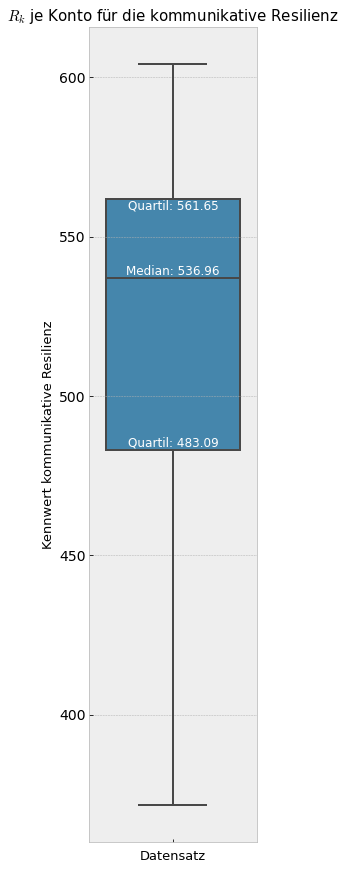

In [29]:
# Create boxplot and calculate upper/lower quartile + median
fig, ax = plt.subplots(figsize=(3,15))
sns.boxplot(y='resilience', data=rdf)
ax.set_xlabel('Datensatz', fontsize=13)
ax.set_ylabel(r'Kennwert kommunikative Resilienz', fontsize=13)
ax.text(0, (rdf['resilience'].quantile(0.25)+1), 'Quartil: ' + str(round(rdf['resilience'].quantile(0.25), 2)), horizontalalignment='center', color='white', fontsize=12)
ax.text(0, (rdf['resilience'].median()+1), 'Median: ' + str(round(rdf['resilience'].median(), 2)), horizontalalignment='center', color='white', fontsize=12)
ax.text(0, (rdf['resilience'].quantile(0.75)-3), 'Quartil: ' + str(round(rdf['resilience'].quantile(0.75), 2)), horizontalalignment='center', color='white', fontsize=12)
plt.title('$R_{k}$ je Konto für die kommunikative Resilienz', fontsize=15)
plt.savefig('A2_1 Boxplot resilience values.png', bbox_inches='tight')